The CryptoFox project is work in progress

This article shows the code to manipulate pandas from CSV (used here in this workbook)


https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

This is Kaggle for datasets (but not used so far here) https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory 

Adding historical BTC data from gdrive 

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


go to https://coinmarketcap.com/currencies/bitcoin/historical-data/ and just copy paste the historical data

more about what is the short (20 days) and long (100 days ) moving average  here https://blog.liquid.com/how-to-trade-cryptocurrency-using-moving-averages

lets connect to the drive and display the data from csv: daily prices of Bitcoin from Aug 2019 to Aug 2021


---



In [ ]:
#myfile = open('gdrive/My Drive/Colab Notebooks/CryptoFox/hdata_BTC.csv')
#print(myfile.read())
#this is just to open a file directly without using pandas

Lets calculate the 20 days moving average for BTC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%y/%m/%d')

#data = pd.read_pickle('./data.pkl') #this command is to read pickle files
hdata = pd.read_csv('gdrive/My Drive/Colab Notebooks/CryptoFox/hdata_BTC.csv') #our data is in csv
hdata.head(10)


,Date,Open,High,Low,Close,Volume,MarketCap
0,2021-08-14,"$47,810.69","$48,098.68","$46,177.63","$47,096.95","$31,211,354,442","$884,769,956,069"
1,2021-08-13,"$44,439.69","$47,831.98","$44,282.42","$47,793.32","$31,744,259,539","$897,802,604,441"
2,2021-08-12,"$45,576.88","$46,228.91","$43,861.45","$44,428.29","$33,723,620,826","$834,546,790,666"
3,2021-08-11,"$45,599.70","$46,735.63","$45,351.71","$45,593.64","$34,319,709,073","$856,398,622,622"
4,2021-08-10,"$46,280.85","$46,637.99","$44,705.56","$45,585.03","$33,546,019,517","$856,195,142,352"
5,2021-08-09,"$43,791.93","$46,456.83","$42,848.69","$46,365.40","$38,734,079,049","$870,805,373,889"
6,2021-08-08,"$44,574.44","$45,282.35","$43,331.91","$43,798.12","$36,302,664,750","$822,545,074,286"
7,2021-08-07,"$42,832.80","$44,689.86","$42,618.57","$44,555.80","$40,030,862,141","$836,730,623,772"
8,2021-08-06,"$40,865.87","$43,271.66","$39,932.18","$42,816.50","$38,226,483,046","$804,022,903,682"
9,2021-08-05,"$39,744.51","$41,341.93","$37,458.00","$40,869.55","$35,185,031,017","$767,423,192,906"


In [ ]:
headers = ["Date", "Close"]
newhdata = pd.concat([pd.to_datetime(hdata["Date"]), hdata["Close"].str.replace(',', '').str.replace('$', '').astype(float)], axis=1, keys=headers)
newhdata.head(20)

,Date,Close
0,2021-08-14,47096.95
1,2021-08-13,47793.32
2,2021-08-12,44428.29
3,2021-08-11,45593.64
4,2021-08-10,45585.03
5,2021-08-09,46365.40
6,2021-08-08,43798.12
7,2021-08-07,44555.80
8,2021-08-06,42816.50
9,2021-08-05,40869.55


In [ ]:
#make the date column the table index 
data = newhdata.set_index(['Date']).iloc[::-1]
# using .iloc[::-1] to invert the table as the dates we get from the web are sorted from earliest day on top
print(data)

               Close
Date                
2019-08-02  10518.17
2019-08-03  10821.73
2019-08-04  10970.18
2019-08-05  11805.65
2019-08-06  11478.17
...              ...
2021-08-10  45585.03
2021-08-11  45593.64
2021-08-12  44428.29
2021-08-13  47793.32
2021-08-14  47096.95

[744 rows x 1 columns]


In [ ]:
dataTypeSeries = data.dtypes
print(dataTypeSeries)

Close    float64
dtype: object


In [ ]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,Close
Date,
2019-08-02,NaN
2019-08-03,NaN
2019-08-04,NaN
2019-08-05,NaN
2019-08-06,NaN
2019-08-07,NaN
2019-08-08,NaN
2019-08-09,NaN
2019-08-10,NaN


In [ ]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail(10)

,Close
Date,
2021-08-05,39469.6762
2021-08-06,39349.5942
2021-08-07,39259.6011
2021-08-08,39120.0805
2021-08-09,39005.4540
2021-08-10,38894.9935
2021-08-11,38778.9270
2021-08-12,38689.8745
2021-08-13,38593.5676


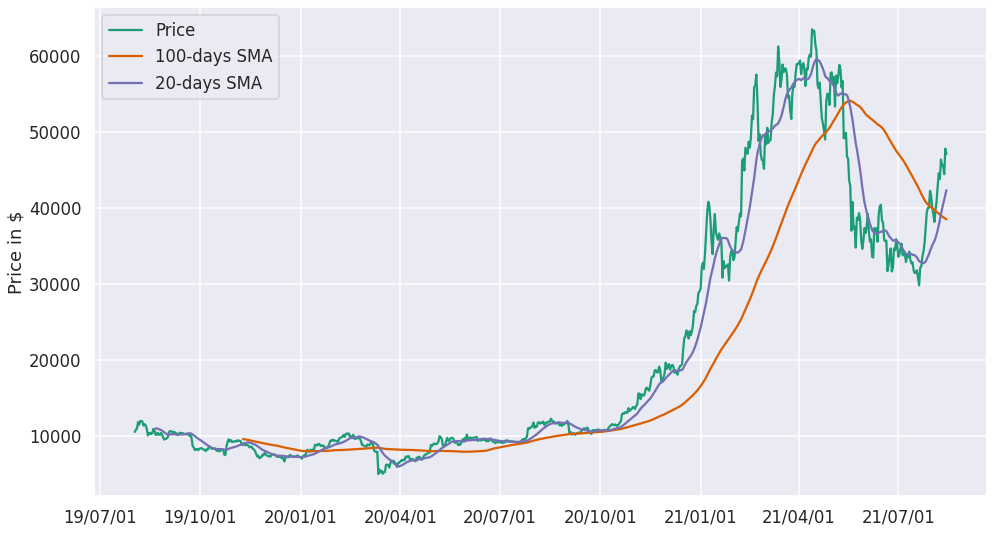

In [ ]:
start_date = '2019-08-02'
end_date = '2021-08-14'

fig, ax = plt.subplots(figsize=(16,9))


ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

Based on the chart above would you invest or not? leave your comments on my github page!

here is the code to replace the pandas with programmatic access to Binance exchange (to be used in the future)

https://colab.research.google.com/drive/1N0oareSybnEmrUJIB_EkLrrapjr24LP1?usp=sharing#scrollTo=tYPzqCTW0Rg8

Next project crypto price prediction. 

Features to predict price of crypto:

1) Exchange data
2) Technical analysis indicators
3) Bitcoin dominance
4) Social volume and sentiment
5) Search volume and sentiment